In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
import sympy as sp
import pandas as pd
%matplotlib inline

This week I have divided the questions into several categories. There are probably more than most people will finish in the hour so have a look through and try to pick ones that you think will help you learn more. They are intended to cover many topics we have worked on.

## Section 1: Basic Python

### Q1.1 Merge Sort

In this question your task is to write a function that takes in 2 np arrays of numbers and returns a single np array which contains all the numbers from both sorted in increasing order. You are not allowed to use the methods `sort` `np.sort` etc. You must do this yourself using loops and flow control.

Ex. Given [1, 6, 3] and [4, 5, 2, 7] we should get:

[1, 3, 2, 4, 5, 6, 7]

In [22]:
def merge_sort(l1, l2):
    """
    l1 and l2 are np arrays. Return a new np array that contains the contents
    of both arrays where the final array is sorted in increasing order.
    """
    # There are many ways to do this.
    # The most common (and best balance of easy coding to efficiency)
    # Is to sort each sublist and then merge them
    for lst in (l1, l2):
        # I will sort each list as we did in previous week
        for i in range(len(lst)):
            small = lst[i]
            ind = i
            for j in range(i+1, len(lst)):
                if lst[j] < small:
                    small = lst[j]
                    ind = j
                    
            # Now swap
            lst[ind] = lst[i]
            lst[i] = small
    
    # Now that they are both sorted, merge them
    new = []
    while len(l1) > 0 or len(l2) > 0:
        if len(l1) == 0:
            for item in l2:
                new.append(item)
                l2 = l2[1:]
                
        elif len(l2) == 0:
            for item in l1:
                new.append(item)
                l1 = l1[1:]
                
        elif l1[0] < l2[0]:
            new.append(l1[0])
            l1 = l1[1:]
            
        else:
            new.append(l2[0])
            l2 = l2[1:]
        
    return np.array(new)

In [23]:
a = np.array([1, 6, 3])
b = np.array([4, 5, 2, 7])

merge_sort(a, b)

array([1, 2, 3, 4, 5, 6, 7])

### Q1.2 Solving a Convergent Equation Numerically

Some equations we come accross cannot be simplified enough to isolate for the desired variable and solve it analytically. In this case, as long as we know that the equation is convergent, we can iterate until we find a solution. 

Here we want to solve the equation:

$$ n - e\sin(n) = M $$

Where $e \in (0, 1)$ and $M \in (0, 2\pi)$ are constants (you can choose the values however you want).

There are many ways to solve this, the simplest is with an iterative approach. First rearrange the expression to:

$$ n = M + e\sin(n) $$

Then to solve this iteratively, we consider the sequence:

$$ n^{(i + 1)} = M + e \sin\left(n^{(i)}\right) $$

And let $n^{(0)} = M$. Then iterate and find each subsequent value of n until the values converge. 

Converge means that the number is the same to about the number of digits python shows you. Usually the last digit will fluctuate so the maximal convergence would be that all but the last decimal place are constant. 

Change the number of iterations to explore the behaviour and see how changing the values of $e$ and $M$ affect the convergence.

**Note that my implementation below is slightly more complicated than what was asked but is a good example of the typical way one solves this problem (using the error bounding).**

In [56]:
def func(M, e, n):
    '''
    Defines the function we want to solve
    '''
    return M + e * np.sin(n)

def solve(M, e):
    '''
    Iteratively solves the function. Stops when either the solution is as close as we want
    based on the error or when we reach max number of iterations. Returns the values of the
    solution as well as number of iterations and error at end.
    '''
    n = M
    max_err = 1e-14
    err = 1.
    max_iter = 1000 # In case the error cannot be bounded so that we do not get infinite loop
    
    it = 0
    while (err > max_err) and (it < max_iter):
        n0 = n
        n = func(M, e, n)
        err = abs(((n0 - n) / n))
        
        it += 1
        
    return (n, it, err)

In [57]:
n, it, err = solve(1.15, 0.8)
n, it, err

(1.9055840600847809, 24, 2.7965549407270217e-15)

### Q1.3 Finding the Roots of and Equation

We looked at the bisection root finding method in one of the previous sessions and you were encouraged to implement Newton's method as an assignment. Use either one of the methods in order to complete this question.

We want to find the the intersection with the x axis. That is we want to find the value of x when:

$$ f(x) = e^{x} \ln(x) - x^2 = 0 $$ 

To solve this problem complete the following:

**a)** Define a python function, f, that returns the value of f(x) given a value of x.

**b)** Plot the function to approximate where the 0 of the function is graphically.

**c)** Use the root finding method of your choice (bisection or Newton) to find the value of the root to machine precision.

In [4]:
# a)
def f(x):
    return np.exp(x) * np.log(x) - x**2

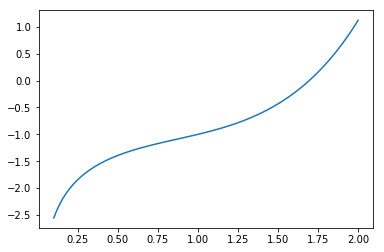

In [5]:
# b) We can see below that there is a root in (0.1, 2)
x = np.linspace(0.1, 2, 100)
plt.plot(x, f(x))

In [6]:
# c) (Bisection)
def bisection(interval, func):
    a, b = interval
    
    middle = (a + b) / 2
    
    f_a = func(a)
    f_b = func(b)
    f_mid = func(middle)
    
    if f_mid < 0 and f_a > 0:
        return [a, middle]
    elif f_mid < 0 and f_a < 0:
        return [b, middle]
    elif f_mid > 0 and f_a > 0:
        return [middle, b]
    else:
        return [middle, a]
    
a, b = [0.1, 2]
N = 100
for i in range(N):
    a, b = bisection([a, b], f)

# If it converged then these are equal and they are the root
a, b

(1.6946009205035546, 1.6946009205035544)

(-1, 1)

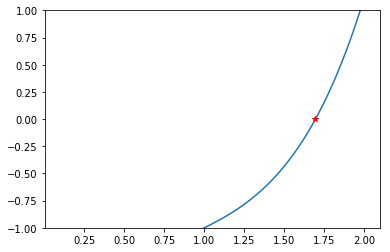

In [8]:
# I can plot this on the graph so you can see where it is.
plt.plot(x, f(x))
plt.plot(a, 0, 'r*')
plt.ylim(-1, 1)

## Section 2: Data Analysis

### Q2.1 Fitting Data with Error Analysis

In this question I will give you some sample data and your job is to find an appropriate fit function, fit the data using scipy least square fit and then analyze RMS error in the best fit curve. 

We did several examples of this so refer to those notes if you are not sure about the syntax.

In [11]:
# This is the data you need to fit
x = np.array([0., 0.26315789, 0.52631579, 0.78947368, 1.05263158,1.31578947, 1.57894737,
              1.84210526, 2.10526316, 2.36842105,2.63157895, 2.89473684, 3.15789474,
              3.42105263, 3.68421053,3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.])

y = np.array([4.78138162, 2.33131727, 0.97613837, 0.78196249, 0.20193565,
              0.34987065, 0.42672317, 0.03884814, 0.34405926, 0.08835883,
              0.15117039, 0.44583307, 0.04770623, 0.17592253, 0.41621695,
              0.29175142, 0.13319173, 0.06514803, 0.42419519, 0.31615752])

Complete the following steps:
    
**a)** Plot the data as a scatter plot.

**b)** Create a function for the best fit curve for the data.

**c)** Calculate the RMS error in the best curve.

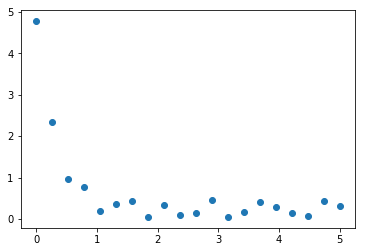

In [12]:
# a)
plt.scatter(x, y)

array([4.5684239 , 3.1131867 , 0.23094671])

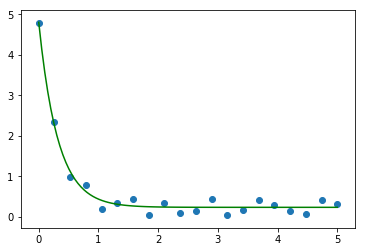

In [13]:
# b)
def fit_func(p, x):
    # Try an exponential decay of most general type
    return p[0] * np.exp(-p[1] * x) + p[2]

def err_func(p, x, y):
    return y - fit_func(p, x)

p0 = [1., 1., 1.]
p1, success = leastsq(err_func, p0[:], args=(x, y))

x_rng = np.linspace(0, 5, 100)
plt.plot(x_rng, fit_func(p1, x_rng), color='green')
plt.scatter(x, y)
p1

In [15]:
# c)
def rms_calc(p, x, y):
    err = err_func(p, x, y)
    err2 = err**2
    tot_err2 = np.sum(err2)
    return np.sqrt(tot_err2 / len(err2))

rms_calc(p1, x, y)

0.14258147244584032

## Section 3: Calculus and Linear Algebra

### Q3.1 Solving a Matrix Equation

Use the linear algebra tools in numpy to solve the following matrix equation:

```
[[7], = [[2, 5], * [[x],
 [4]]    [4, 6]]    [y]]
```

For x and y.

In [87]:
# Create the matrices
v = np.array([[7], [4]])
A = np.array([[2, 5], [4, 6]])

# Now invert the matrix
AI = np.linalg.inv(A)

# Now multiply v from the left by the inverted matrix and that is the solution
res = AI.dot(v)
res

array([[-2.75],
       [ 2.5 ]])

In [90]:
# Double check that it works (compute RH side)
A.dot(res)

array([[7.],
       [4.]])

### Q3.2 Fiding Eigenvalues and Eigenvectors and Checking Orthogonality

Find the eigenvalues and eigenvectors of the following $2\times2$ matrix. Check if the eigenvectors are orthogonal.

```
[[0, 1],
 [1, 0]
```

In [92]:
A = [[0, 1], [1, 0]]

# We use the numpy linear algebra module
e_val, e_vec = np.linalg.eig(A)

e_val, e_vec

(array([ 1., -1.]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [93]:
# Checking orthogonality - They are orthogonal if the dot product of the vectors is 0
e_vec[0].dot(e_vec[1])

0.0

### Q3.3 Integration and with Sympy

Use Sympy to solve the following double integral:

$$ \int_{0}^{4}\int_{1}^{\sqrt{x-1}} y dy dx$$

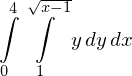

In [110]:
sp.init_printing()
x, y = sp.symbols("x, y")

I1 = sp.Integral(y, (y, 1, sp.sqrt(x-1)))
I = sp.Integral(I1, (x, 0, 4))
I

In [111]:
I.doit()

## Section 4: Numerical Integration

### Q4.1 Computing Energy Error in Solar System Integration

Add to the code we wrote to integrate the solar system to calculate the conservation of energy for the earth. The orbital energy is computed as follows:

$$ E = T + U = \frac{1}{2} m_e v^2 - \sum_{i = 0, i \ne e}^{n} \left( \frac{Gm_e m_i}{|r_e - r_i|} \right) $$

Where the sum means to sum the effect of the potential from all of the other planets and the sun. 

To calculate the error, we must do the following:

**a)** Before you start the calculation, calculate and store the initial energy of the earth. 

**b)** Each step of the integration, calculate the energy and then the error, where the error can be calculated as: $(e_n - e_{init}) / e_{init}$ where $e_{init}$ is the initial energy and $e_n$ is the energy on the current step. Store the results in an array so we can analyze it after.

**c)** Plot the values of error (from the array you made above) vs the time of the integration. Observe the result and see if you can comment of the physics of it. Try it with different timesteps and with Euler and Leapfrog. Which method is better and what happens when the timestep changes?

**d)** Now do it for Mercury instead of Earth. What changes and why? How could we fix this?

Solution: First I will copy the code for the numerical integration with the leapfrog method from the lecture notes with some modifications to calculate energy. I will also add some functions to calculate the energy.

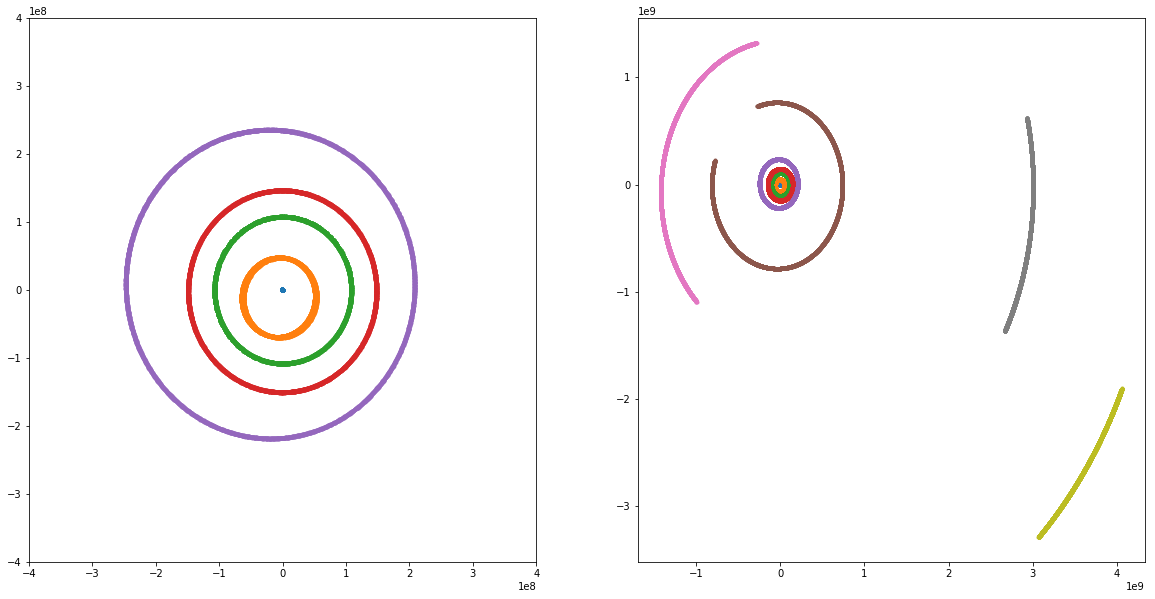

In [28]:
"""************************"""
# Solution parts are added below the above type of line
# The rest is just copied from the tutorial.

# Read Data
df = pd.read_csv("solar_sys.txt", sep=" ")
names = np.array(df.name)
mi = np.array(df.mass)
xi = np.array([[df.x[i], df.y[i], df.z[i]] for i in range(len(df.x))])
vi = np.array([[df.vx[i], df.vy[i], df.vz[i]] for i in range(len(df.vx))])

"""************************"""
# Add equation to calculate potential
def calc_potential(x1, x2, m1, m2):
    G = 6.67384e-20
    dx = x1[0] - x2[0]
    dy = x1[1] - x2[1]
    dz = x1[2] - x2[2]
    
    r = np.sqrt(dx**2 + dy**2 + dz**2)
    return (G*m1*m2) / r

"""************************"""
# Add an equation to calculate the energy
def energy_calc(x, v, m, ind):
    N = len(x)

    v2 = v[ind][0]**2 + v[ind][1]**2 + v[ind][2]**2
    T = 0.5 * m[ind] * v2
    U = 0.
    
    for i in range(N):
        if i != ind:
            U -= calc_potential(x[ind], x[i], m[ind], m[i])
            
    return T + U


# Acceleration Equation
def rhs(x1, x2, m2):
    G = 6.67384e-20
    dx = x1[0] - x2[0]
    dy = x1[1] - x2[1]
    dz = x1[2] - x2[2]
    r2 = dx*dx + dy*dy + dz*dz
    return [-G*m2*dx/(r2*np.sqrt(r2)), -G*m2*dy/(r2*np.sqrt(r2)), -G*m2*dz/(r2*np.sqrt(r2))]


# Leapfrog integration step
def leapfrog_step(x, v, m, rhs, dt):
    N = len(x)
    for i in range(N):
        x[i][0] += v[i][0] * dt/2
        x[i][1] += v[i][1] * dt/2
        x[i][2] += v[i][2] * dt/2
        
    for i in range(N):
        # Calculate the total acceleration
        ax = 0.
        ay = 0.
        az = 0.
        for j in range(N):
            if i != j:
                a = rhs(x[i], x[j], m[j])
                ax += a[0]
                ay += a[1]
                az += a[2]
      
        v[i][0] += ax * dt
        v[i][1] += ay * dt
        v[i][2] += az * dt
        
    for i in range(N):
        x[i][0] += v[i][0] * dt/2
        x[i][1] += v[i][1] * dt/2
        x[i][2] += v[i][2] * dt/2
        
        
# Integrate the system
t = 0.
t_max = 10. * 365. * 24. * 60. * 60. # 1 year
dt = 1. * 24. * 60. * 60. # 1 day

mass = mi.copy()
x = xi.copy()
v = vi.copy()

# We will store x and y components of positions as array:
#     x1, x2, x3, x4, ... x9

x_res = []
y_res = []
t_res = []

"""************************"""
# Calculate the Initial Energy of earth (index 3)
Ei = energy_calc(x, v, mass, 3)

"""************************"""
# Store the energy error
e_err = []

while t<t_max:
    x_res.append([x[i][0] for i in range(len(x))])
    y_res.append([x[i][1] for i in range(len(x))])
    t_res.append(t)
    
    """************************"""
    # Calculate the energy and error and store
    E = energy_calc(x, v, mass, 3)
    e_err.append(abs((E - Ei) / Ei))
    
    leapfrog_step(x, v, mass, rhs, dt)
    t += dt
    
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].plot(x_res, y_res, '.')
ax[0].set_xlim(-4e8, 4e8)
ax[0].set_ylim(-4e8, 4e8)

ax[1].plot(x_res, y_res, '.')
plt.show()

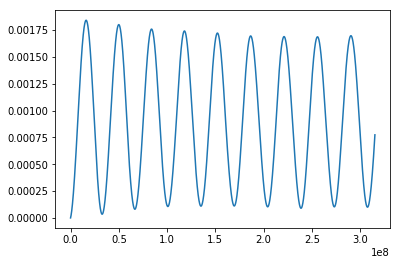

In [29]:
"""************************"""
# Plot the error
plt.plot(t_res, e_err)